In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import StandardScaler
import numpy as np

In [2]:
constructor_results = pd.read_csv("Data/constructor_results.csv")
constructor_standings = pd.read_csv("Data/constructor_standings.csv")
constructors = pd.read_csv("Data/constructors.csv")
races = pd.read_csv("Data/races.csv")

In [3]:
# Merging
merged_data = pd.merge(constructor_standings, constructor_results, on=['raceId', 'constructorId'])
races['year'] = pd.to_datetime(races['date']).dt.year
merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')
merged_data = pd.merge(merged_data, constructors[['constructorId', 'name']], on='constructorId')
merged_data.to_csv('Part 3/merged_data.csv')

In [4]:
# Calculate performance metrics
metrics = merged_data.groupby(['constructorId', 'name', 'year']).agg({
    'points_x': 'sum',
    'points_y': 'sum',
    'wins': 'sum',
    'position': 'mean'
}).reset_index()

metrics = metrics.rename(columns={
    'points_x': 'championship_points',
    'points_y': 'race_points',
    'wins': 'race_wins',
    'position': 'average_position'
})


In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(metrics[['championship_points', 'race_points', 'race_wins', 'average_position']])
scaled_metrics_df = pd.DataFrame(scaled_metrics, columns=['championship_points_scaled', 'race_points_scaled', 'race_wins_scaled', 'average_position_scaled'])
metrics = pd.concat([metrics, scaled_metrics_df], axis=1)

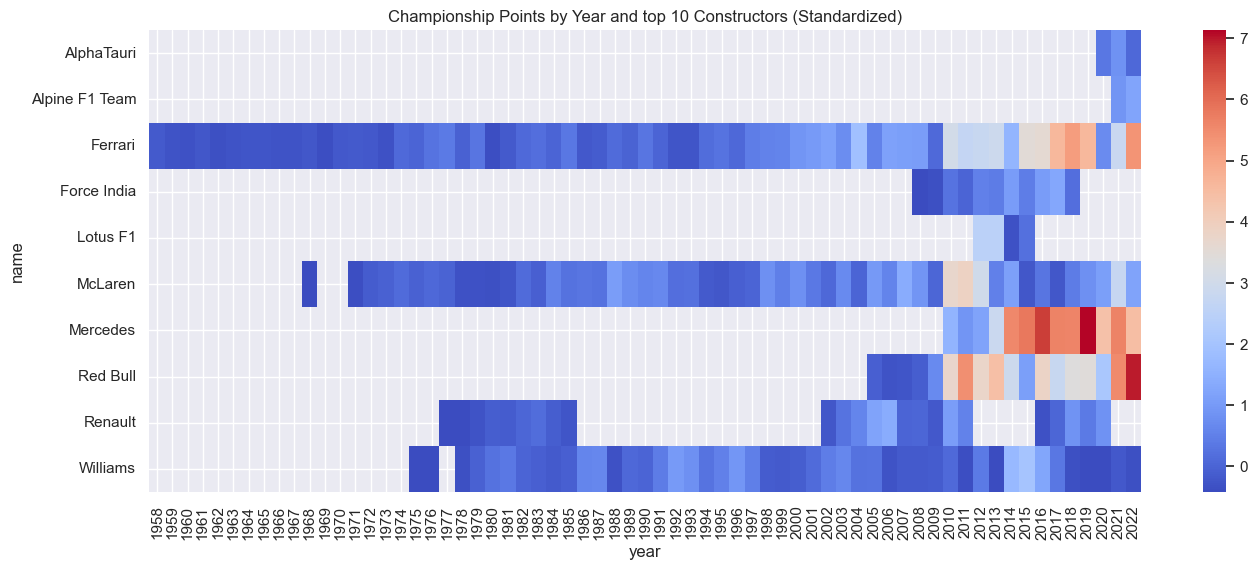

In [7]:
# Plot top 10 constructors by championship points
top_10 = metrics.groupby('name').agg({'championship_points_scaled': 'sum'}).nlargest(10, 'championship_points_scaled').index.tolist()
matrix = pd.pivot_table(metrics[metrics['name'].isin(top_10)], values='championship_points_scaled', index='name', columns='year')
sns.set()
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(matrix, xticklabels=True, yticklabels=True, cmap='coolwarm', ax=ax)
ax.set_title('Championship Points by Year and top 10 Constructors (Standardized)')
plt.show()

In [19]:
import plotly.express as px

# Select top 10 constructors by championship points
top_10 = list(metrics.groupby('name').sum().sort_values(by='championship_points', ascending=False)[:10].index)

# Filter metrics by top 10 constructors and top 3 finishes, and drop null and zero values
filtered_metrics = metrics[metrics['name'].isin(top_10)]
filtered_metrics.replace(0, np.nan, inplace=True)
filtered_metrics.dropna(inplace=True)
filtered_metrics = filtered_metrics[filtered_metrics['average_position'] <= 3]

fig = px.sunburst(filtered_metrics, path=['name', 'year'], values='championship_points',
                  color='average_position', color_continuous_scale='RdYlBu', range_color=[0, filtered_metrics['average_position'].max()],
                  hover_data={'championship_points': ':.2f', 'race_points': ':.2f', 'race_wins': ':d', 'average_position': ':.2f'},
                  title='Championship Points Distribution by Constructor and Year')

# Update layout to add margins and increase figure size
fig.update_layout(margin=dict(t=30, l=0, r=0, b=0), width=900, height=900)

# Show plot
fig.show()


C:\Users\Yacer\AppData\Local\Temp\ipykernel_29660\2932100459.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yacer\AppData\Local\Temp\ipykernel_29660\2932100459.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

